<a href="https://colab.research.google.com/github/shivamkrishna1000/MNIST-Digit-Classification-with-Neural-Network/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(xtrain)

numpy.ndarray

In [4]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(xtrain[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(xtrain[10].shape)

(28, 28)


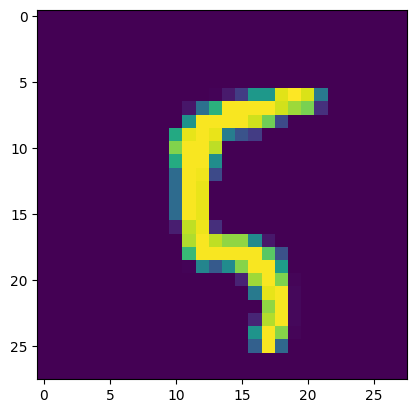

5


In [7]:
#displaying the image

plt.imshow(xtrain[100])
plt.show()

print(ytrain[100])

In [8]:
#unique values in ytrain
print(np.unique(ytrain))


#unique values in ytest
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#scaling the values
xtrain=xtrain/255
xtest=xtest/25

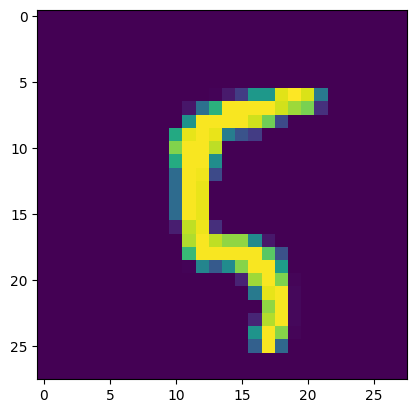

5


In [10]:
#displaying the image

plt.imshow(xtrain[100])
plt.show()

print(ytrain[100])

In [11]:
print(xtrain[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [13]:
#compiling the nueral network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3054 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1455 - accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0713 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.037

In [16]:
loss, accuracy=model.evaluate(xtest,ytest)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.8106 - accuracy: 0.9719
0.9718999862670898


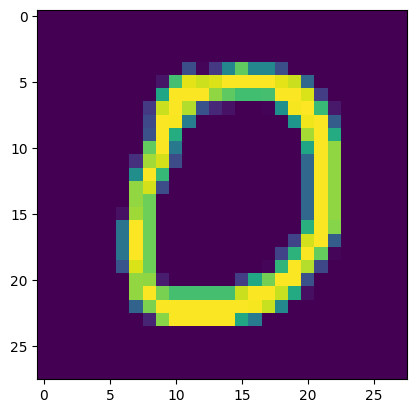

In [23]:
plt.imshow(xtest[10])
plt.show()

In [24]:
print(ytest[10])

0


In [25]:
ypred=model.predict(xtest)

313/313 [==============================] - 0s 2ms/step


In [30]:
print(ypred[10])

[1.0000000e+00 0.0000000e+00 1.0146851e-04 6.2454408e-23 0.0000000e+00
 6.2793263e-27 5.9519284e-13 1.2468529e-08 1.8380149e-27 5.9421176e-01]


In [31]:
print(np.argmax(ypred[10]))

0


In [34]:
ypred.shape

(10000, 10)

In [42]:
y_pred=[np.argmax(i) for i in ypred]

In [43]:
print(y_pred[10])

0


In [44]:
print(y_pred)

[3, 1, 1, 0, 4, 1, 4, 3, 5, 4, 0, 0, 9, 0, 1, 3, 7, 2, 3, 4, 7, 5, 0, 3, 4, 0, 2, 4, 0, 1, 3, 1, 3, 4, 2, 2, 2, 1, 2, 1, 1, 3, 4, 1, 3, 5, 1, 1, 4, 4, 5, 3, 5, 3, 0, 0, 4, 1, 4, 5, 3, 2, 9, 3, 3, 4, 6, 4, 3, 0, 2, 0, 2, 7, 1, 1, 3, 2, 4, 2, 7, 0, 2, 7, 8, 4, 3, 3, 0, 1, 3, 5, 4, 3, 1, 4, 1, 3, 5, 9, 0, 0, 3, 4, 3, 3, 2, 1, 4, 4, 3, 1, 3, 9, 3, 4, 4, 4, 9, 2, 3, 4, 2, 6, 4, 4, 0, 5, 3, 3, 6, 5, 3, 2, 5, 1, 0, 1, 0, 4, 5, 2, 3, 1, 3, 1, 8, 2, 0, 9, 9, 5, 5, 5, 1, 5, 0, 0, 2, 1, 4, 6, 3, 4, 0, 3, 4, 5, 1, 4, 4, 3, 1, 3, 2, 1, 1, 8, 1, 2, 1, 3, 5, 0, 3, 9, 2, 3, 0, 1, 1, 1, 0, 3, 0, 3, 1, 5, 4, 2, 3, 0, 1, 1, 1, 3, 8, 3, 2, 3, 4, 3, 3, 3, 8, 0, 3, 0, 5, 3, 7, 2, 2, 2, 1, 2, 3, 4, 1, 1, 3, 3, 5, 3, 1, 7, 2, 1, 4, 1, 3, 3, 8, 3, 2, 3, 0, 2, 4, 2, 4, 1, 9, 3, 2, 2, 2, 8, 2, 0, 2, 3, 2, 1, 4, 1, 0, 1, 3, 0, 3, 0, 1, 3, 3, 4, 1, 8, 0, 1, 2, 9, 1, 5, 9, 2, 5, 4, 1, 3, 3, 1, 7, 2, 0, 4, 0, 0, 2, 8, 4, 1, 1, 2, 4, 0, 2, 3, 4, 3, 3, 0, 0, 3, 1, 3, 5, 5, 2, 3, 3, 2, 3, 3, 0, 4, 2, 0, 3, 1, 1, 2, 1, 

In [45]:
conf_mat=confusion_matrix(ytest,y_pred)

In [46]:
print(conf_mat)

tf.Tensor(
[[ 976    0    0    3    0    1    0    0    0    0]
 [   0 1130    0    1    0    1    1    0    2    0]
 [  55  208  762    2    1    1    0    0    2    1]
 [   3    6   39  959    0    2    0    1    0    0]
 [  10   18   19    1  932    0    0    1    0    1]
 [   8    3    2  556    2  319    0    1    0    1]
 [ 405    3   14    4   34  249  249    0    0    0]
 [  30  138  344  250   20    3    1  242    0    0]
 [ 100    4   50  313   15  165    6   11  310    0]
 [  15    8    2  215  271   12    0  220   47  219]], shape=(10, 10), dtype=int32)


<function matplotlib.pyplot.show(close=None, block=None)>

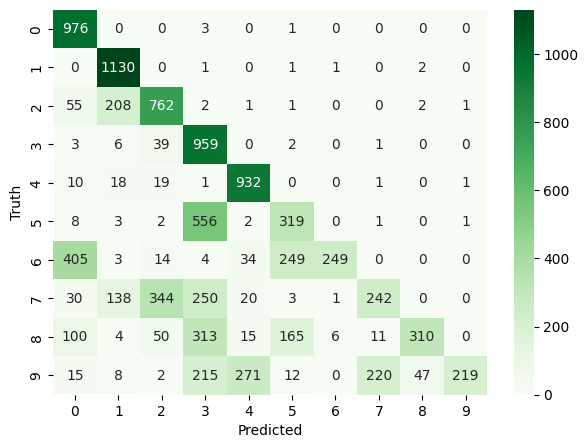

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

Predictive System

In [75]:
input_img_path='/content/MNIST_digit.png'

input_img=cv2.imread(input_img_path)

In [76]:
type(input_img)

numpy.ndarray

In [77]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


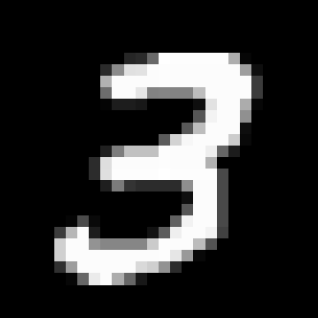

In [78]:
cv2_imshow(input_img)

In [79]:
input_img.shape

(318, 318, 3)

In [80]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [81]:
grayscale.shape

(318, 318)

In [82]:
input_img_resize=cv2.resize(grayscale,(28,28))

In [83]:
input_img_resize.shape

(28, 28)

In [84]:
cv2_imshow(input_img_resize)

In [85]:
input_img_resize=input_img_resize/255

In [86]:
input_img_reshape=np.reshape(input_img_resize,(1,28,28))

In [87]:
prediction=model.predict(input_img_reshape)
print(prediction)

1/1 [==============================] - 0s 39ms/step
[[3.7226316e-10 5.3582103e-09 9.8827036e-07 1.0000000e+00 9.8861260e-18
  1.2096129e-02 2.7182998e-17 1.6073065e-01 4.2561484e-03 9.2479241e-01]]


In [88]:
prediction_label=np.argmax(prediction)

In [89]:
print(prediction_label)

3


In [101]:
input_path_str = input("Path of the Image : ")

input_img = cv2.imread(input_path_str)

grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

input_img_resize = cv2.resize(grayscale, (28, 28))

input_img_resize = input_img_resize / 255

input_img_reshape = np.reshape(input_img_resize, (1, 28, 28))

prediction = model.predict(input_img_reshape)

prediction_label = np.argmax(prediction)

print(prediction_label)

Path of the Image : /content/MNIST_digit.png
1/1 [==============================] - 0s 28ms/step
3
